---

<img src="./source/Logo_HHN.png" alt="Logo_Hochschule_Heilbronn" align="right" style="width: 300px;"/>

---

# Boosting & AdaBoosted Decision Tree (Klassifikation)

## Teammitglieder

**Fabian Sauer** (197116)  
<fsauer@stud.hs-heilbronn.de>  
  
**Manuel Wittig** (194217)  
<mwittig@stud.hs-heilbronn.de>   

## Inhaltsverzeichnis

* [Einleitung](#Einleitung)
* [Grundlagen Boosting](#Grundlagen-Boosting)
* [Praxisbeispiel Boosting](#Praxisbeispiel-Boosting)
* [Grundlagen AdaBoost](#Grundlagen-AdaBoost)
* [Praxisbeispiel AdaBoost](#Praxisbeispiel-AdaBoost)
* [Vor- und Nachteile](#Vor--und-Nachteile)
* [Literatur](#Literatur)

## Einleitung

Machine Learning untersucht automatische Lerntechniken, um auf der Grundlage früherer Beobachtungen genaue Vorhersagen treffen zu können (Schapire, 2003). Nehmen wir zum Beispiel an, dass wir ein Modell bauen möchten, welches die Abwanderung von Kunden prognostizieren kann. Der maschinelle Lernansatz für dieses Problem würde grob folgendermaßen aussehen:

<img src="source/Churn.PNG" width="1000">

Beginnen der Sammlung von so vielen Kundendaten wie möglich für die Abwanderungsprognose. Als Nächstes würden diese Beispiele zusammen mit Labeln, die angeben, ob es sich um Abgänge handelt oder nicht, mit dem bevorzugten maschinellen Lernalgorithmus trainiert, der automatisch eine Klassifizierungs- oder Vorhersage-Regel erstellt. 

Angesichts neuer, nicht gelabelten Kundendaten versucht eine solche Regel vorherzusagen, ob es sich um einen Abgang handelt oder nicht. Das Ziel besteht natürlich darin, eine Regel zu generieren, die möglichst genaue Vorhersagen für neue Testbeispiele ermöglicht.

Die Entwicklung einer hochpräzisen Prognoseregel ist allerdings eine komplexe Aufgabe. Auf der anderen Seite ist es überhaupt nicht schwer, sehr grobe Faustregeln aufzustellen, die nur mäßig genau sind. Ein Beispiel für eine solche Regel ist etwas wie die folgende: "Wenn der Kunde einen Monatsvertrag besitzt, vorhersage das der Kunde abwandert."

Eine solche Regel wird nicht einmal annähernd alle Möglichkeiten abdecken. Sie sagt zum Beispiel wirklich nichts darüber aus, was vorherzusagen ist, wenn der Vertrag kein Monatsvertrag ist. Andererseits wird diese Regel Vorhersagen machen, die deutlich besser sind als zufällige Vermutungen.

<img src="source/boosting_intro1.PNG" width="1000">

## Grundlagen Boosting

Boosting ist eine Klasse von allgemeinen und nachweislich wirksamen maschinellen Lernmethoden, die auf der Idee und Beobachtung basiert, dass eine Kombination von sehr einfachen Klassifikatoren bessere Leistungen erbringen kann als jeder der einfachen Klassifikatoren für sich allein und zudem auch simpler zu generieren ist als ein hochgenauer Klassifikator ( vgl. Freund and Schapire, 1999; Meir and Rätsch, 2003; Ferreira and Figueiredo, 2012; Polikar, 2012).

### Hintergrund

Die Idee des Boosting hat ihre Wurzeln im PAC-Lernen (Wahrscheinlich Annähernd Richtiges Lernen / Probably Approximately Correct Learning). Kearns und Valiant waren hierbei die ersten, die die Frage stellten, ob ein "schwacher" Lernalgorithmus, der nur geringfügig besser performt als zufälliges Raten, zu einem beliebig genauen "starken" Lernalgorithmus "geboostet" werden kann (Valiant, 1984; Kearns and Valiant, 1994). 

Ein weiterer zentraler und wichtiger Einfluss zur Idee des Boosting ist der von (Schapire, 1990) nachgewiesene Fakt, dass es möglich ist, einen Strong Learner durch die Kombination einer Menge von Weak Learner zu erzeugen. Schapire hat dabei gezeigt, dass diese Lernmethode in dem oben definierten Sinne stark ist. Darüber hinaus kann der Trainingsfehler durch die rekursive Anwendung dieses Ansatzes weiter reduziert werden, d.h. jeder Learner kann selbst durch ein Boosting-Verfahren erzeugt werden (Schapire, 1990).

Nach diesem Vorschlag von (Schapire, 1990) schlug (Freund, 1995) einen neuen Boosting-Algorithmus vor, der auf diesen vorgestellten Ideen basiert und diese zugleich verbessert. Der hierbei entwickelte Algorithmus verbessert die Genauigkeit von Algorithmen zum Lernen binärer Klassifikatoren, indem er eine große Anzahl von Klassifikatoren kombiniert, von denen jeder durch Ausführen der gegebenen Lernmethode an einem anderen Satz von Testbeispielen erhalten wird (Freund and Schapire, 1999).

Wie in (Schapire, 1990), litten aber auch diese neuen Vorschläge von (Freund, 1995) unter mehreren Nachteilen. Im Besonderen der Notwendigkeit eines sehr großen Trainings-Sets, da dieses Set in viele Sub-Samples unterteilt werden muss (Freund and Schapire, 1999).

Die ersten Experimente mit diesen frühen Boosting-Algorithmen wurden von Drucker, Schapire und Simard an einer OCR-Aufgabe durchgeführt (Freund and Schapire, 1999).

### Boosting Algorithmen

Boosting, vorgestellt in (Schapire, 1990), ist ein zumeist iterativer oder sequentieller Ansatz zur Erzeugung eines starken Klassifikators der in der Lage ist einen beliebig niedrigen Trainingsfehler zu erzielen und selbst aber aus einem Ensemble schwacher Klassifikatoren erzeugt wird, welche selbst kaum besser performen als zufälliges Raten (vgl. Polikar, 2012).

Eine wichtige Grundlage des Boostings um diese Ensembles von einfachen Klassifikatoren bilden und verstehen zu können ist das Konzept von Weak und Strong Learnern. Unter dem Konzept der Weak Learner sind hierbei Lernalgorithmen zu verstehen die einen Klassifikator mit einer Fehlerwahrscheinlichkeit erzeugen, die strikt aber nur geringfügig niedriger ist als die einer zufälligen Schätzung. Im Fall eines binären Problems also 50 Prozent. Im Gegensatz dazu existieren die Strong Learner, welche bei genügend Trainingsdaten Klassifikatoren mit beliebig kleiner Fehlerwahrscheinlichkeit erzeugen können (vgl. Ferreira und Figueiredo, 2012).

Zur Veranschaulichung dieser Idee der Kombination von Weak Learnern zu einem Strong Learner dient die Abbildung 1. Hierbei produzieren die Weak Learner jeweils eigene unabhängige Hypothesen als Output, welche durch Kombination der Weak Learner den Output des Ensembles von Klassifikatoren erzeugen (vgl. Ferreira and Figueiredo, 2012).

![alt text](source/Weak_Learner.PNG "Kombination von Weak Learnern zu einem Strong Learner.")

Die grundlegende Strategie des Boostings von Klassifikatoren besteht nun also darin, viele schwache Klassifikatoren zu lernen und sie auf irgendeine Weise zu kombinieren, anstatt zu versuchen, einen einzelnen starken Klassifikator zu erlernen. Diese Idee, Ensembles von Klassifikatoren so aufzubauen, hat im letzten Jahrzehnt deutlich an Interesse gewonnen, die Begründung dafür ist, dass es einfacher sein könnte, mehrere einfache Klassifikatoren zu trainieren und sie zu einem komplexeren Klassifikator zu kombinieren, als einen einzelnen komplexen Klassifikator zu erlernen (vgl. Ferreira and Figueiredo, 2012).

Um diese Strategie des Boostings anzuwenden wird zunächst ein Algorithmus benötigt, der einen grundlegenden Klassifikator zum Problem bilden kann. Der Boosting-Algorithmus verwendet diesen Weak oder Basis-Lernalgorithmus wiederholt, wobei dieser jedes Mal mit einer anderen Teilmenge der Trainingsdaten trainiert wird, oder genauer gesagt, mit einer anderen Verteilung oder Gewichtung über das Training-Sample. Jedes Mal, wenn der Basis-Lernalgorithmus verwendet wird muss er einen neuen schwache Klassifikator erzeugen und nach vielen Runden muss der Boosting-Algorithmus diese schwachen Klassifikatoren zu einem einzigen Klassifikator kombinieren, der dabei hoffentlich viel genauer ist als jeder der schwachen Klassifikatoren (vgl. Ferreira and Figueiredo, 2012).

1. Wie sollten die schwachen Klassifikatoren zu einem starken kombiniert werden?  


2. Wie sollte die Gewichtung in jeder Runde gewählt werden?

Im Wesentlichen besteht der Prozess des Boosting also darin, die Algorithmen der Weak oder Basis-Lernalgorithmen wiederholt auf unterschiedlich gewichtete Versionen der Trainingsdaten anzuwenden, was eine Folge von schwachen Klassifikatoren ergibt, die kombiniert werden. Was die Kombination der schwachen Klassifikatoren anbelangt, so ist es häufig natürlich und effektiv, einfach eine gewichtete Mehrheitsentscheidung über ihre Vorhersagen zu treffen. Die Gewichtung jeder Instanz in den Trainingsdaten bei jeder Runde des Algorithmus hängt von der Genauigkeit der vorherigen Klassifikatoren ab, sodass der Algorithmus seine Aufmerksamkeit auf jene Stichproben konzentrieren kann, die noch immer falsch klassifiziert sind (vgl. Meir and Rätsch, 2003; Polikar, 2012). Bei der Wahl der Gewichtung wird daher häufige eine Technik verwendet, welche das meiste Gewicht auf die Beispiele legen, die durch die vorhergehenden schwachen Klassifikatoren am häufigsten falsch klassifiziert wurden, dies hat zur Folge, dass der Basis-Lernalgorithmus gezwungen ist, seine Aufmerksamkeit auf die "härtesten" Beispiele zu richten (vgl. Ferreira and Figueiredo, 2012). 

Detailliert und spezifischer kann hierbei auch der Prozess des Boostings für binäre Klassenprobleme dienen. Das Boosting erzeugt dabei Sätze von jeweils drei schwachen Klassifikatoren: Der erste Klassifikator (oder Hypothese) H1 wird auf einem zufälligen Teilsatz der verfügbaren Trainingsdaten trainiert, ähnlich wie beim Bagging. Der zweite Klassifikator, H2, wird auf einer anderen Teilmenge des ursprünglichen Datensatzes trainiert sowie mit 50 Prozent der fehlklassifizierten Daten von H1. Eine solche Trainingsuntermenge gilt als die "informativste", wenn man die Entscheidung von H1 berücksichtigt. Der dritte Klassifikator H3 wird dann mit Instanzen trainiert, bei denen H1 und H2 nicht übereinstimmen. Diese drei Klassifikatoren werden dann durch eine dreiseitige Mehrheitsentscheidung kombiniert. Abbildung 2 dient hierbei als visuelle Unterstützung um diesem Prozess nachvollziehen zu können.

![alt text](source/boosting.PNG "Grundlegende Idee des Boosting.")

Die verschiedenen Varianten von Boosting-Algorithmen unterscheiden sich dabei primär in der Auswahl der Weak bzw. Basis-Algorithmen und dem Kriterium für die Aktualisierung der Gewichtung der unterschiedlichen Trainingsdaten (vgl. Meir and Rätsch, 2003; Polikar, 2012).


### Decision Trees und Decision stump

#### Decision Trees 
Entscheidungsbäume (DTs) sind eine nichtparametrische, überwachte Lernmethode, die zur Klassifizierung und Regression verwendet wird. Ziel ist es, ein Modell zu erstellen, das den Wert einer Zielvariablen vorhersagt, indem einfache Entscheidungsregeln gelernt werden, die aus den Datenmerkmalen abgeleitet werden.

![alt text](source/dt.PNG)

Typische Nachteile:

- Entscheidungsbäumen Learner können überkomplexe Bäume erstellen, die die Daten nicht gut verallgemeinern. Dies wird als Overfitting bezeichnet. Um dieses Problem zu vermeiden, sind Mechanismen wie das Pruning, das Festlegen der minimalen Anzahl der an einem Blattknoten erforderlichen Stichproben oder das Festlegen der maximalen Tiefe des Baumes erforderlich.

- Entscheidungsbäume können instabil sein, weil kleine Abweichungen in den Daten dazu führen können, dass ein völlig anderer Baum erzeugt wird. Dieses Problem wird durch die Verwendung von Entscheidungsbäumen innerhalb eines Ensembles gemildert.


#### Decision Stump

Ein Entscheidungsstumpf ist ein maschinelles Lernmodell, das aus einem einstufigen Entscheidungsbaum besteht. Das heißt, es ist ein Entscheidungsbaum mit einem internen Knoten (der Wurzel), der unmittelbar mit den Endknoten (seinen Blättern) verbunden ist. Ein Entscheidungsstumpf macht eine Vorhersage auf der Grundlage des Wertes nur eines einzelnen Eingabemerkmals. Manchmal werden sie auch als 1-Regeln bezeichnet.

![alt text](source/stump.PNG)

### Zusammenhang Boosting, Bagging, Bootstrapping

Der Zusammenhang zwischen diesen drei Techniken ergibt sich aus dem Fakt, dass diese alle auf Random Sampling aufbauen. Dabei nutzen allerdings nur Bootstrapping und Bagging Random Sampling mit Replacement während Boosting dieses ohne Replacement einsetzt. Abbildung 3 verdeutlicht hierbei den bestehenden Zusammengang und Abgrenzung der drei Techniken nach ihrem Output und der Art wie die Trainingsdaten behandelt werden. Bagging und Boosting haben hierbei die Tatsache gemeinsam, dass beide die Endklassifizierungen durch Mehrheitsentscheidung der einzelnen Klassifizierer bestimmen (vgl. Ferreira and Figueiredo, 2012).


![alt text](source/bagg_boost_boot.PNG "Kombination von Weak Learnern zu einem Strong Learner.")


Zudem ist festzuhalten, dass Boosting zwar auch ein Ensemble von schwachen Klassifizierern durch einfache Mehrheitsbeschlüsse zusammenführt, sich aber in einem entscheidenden Punkt vom Bagging unterscheidet. Beim Bagging werden Instanzen, die für das Training einzelner Klassifizierer ausgewählt wurden, mit Bootstrap-Replikaten der Trainingsdaten versehen, was bedeutet, dass jede Instanz die gleiche Chance hat, in jedem Trainingsdatensatz zu sein. Beim Boosting hingegen konzentriert sich der Trainingsdatensatz jedoch zunehmend auf Fälle, die von zuvor erzeugten Klassifikatoren falsch klassifiziert wurden (Polikar, 2012).

## Praxisbeispiel Datenaufbereitung

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv('./data/TelcoCustomerChurn.csv', na_values=[' ']).drop('customerID', axis=1)

In [118]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [120]:
df[df['TotalCharges'].isna()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

In [121]:
df.SeniorCitizen.replace(to_replace=[0,1], value=['No','Yes'], inplace=True)

In [122]:
df = df[df['TotalCharges'].notna()]

In [123]:
TARGET = 'Churn'

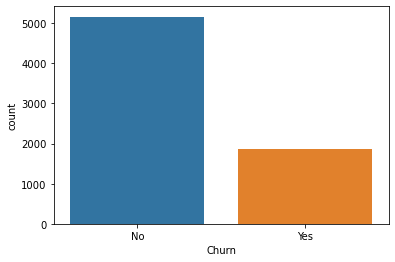

In [124]:
sns.countplot(data=df, x=TARGET);

In [125]:
df[TARGET].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [126]:
df[TARGET].value_counts()/df[TARGET].count()

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

### Boxplots

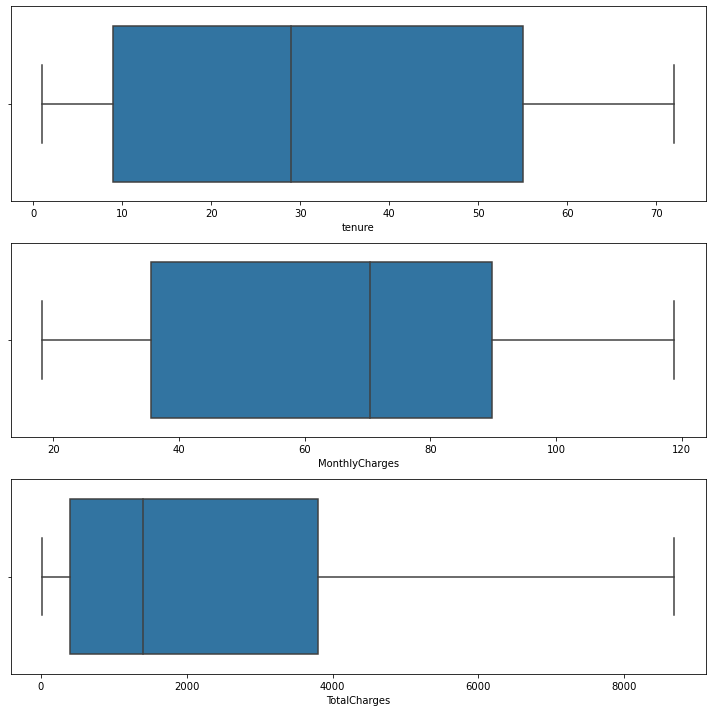

In [127]:
# Visuelle Überprüfung auf Ausreißer mit Hilfe von individuellen Boxplots

# Namen der numerische Merkmale extrahieren
cols_num = df.describe().columns
fig, axes = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(10,10))
# Boxplot für jedes numerische Merkmal
for i in range(len(cols_num)):
    sns.boxplot(x=cols_num[i], orient='h', data=df, ax=axes[i])

# improve spacing and show
fig.tight_layout()
plt.show()

### Data Frame Transformation

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [129]:
df_num = pd.get_dummies(df.drop(TARGET, axis=1)).join(df[TARGET])

In [130]:
y = df_num[TARGET]
X = df_num.drop('Churn', axis=1)

In [131]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   gender_Female                            7032 non-null   uint8  
 4   gender_Male                              7032 non-null   uint8  
 5   SeniorCitizen_No                         7032 non-null   uint8  
 6   SeniorCitizen_Yes                        7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## Praxisbeispiel Boosting

In diesem Praxisbeispiel wird das grundlegende Vorgehen von Boosting anhand von 3 Iterationen dargestellt.

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [134]:
df_Test = df_num.sample(1000, random_state=42)
df_Test_y = df_Test[TARGET]
df_Test_X = df_Test.drop(TARGET, axis=1)

In [135]:
df_Train = pd.concat([df_num,df_Test]).drop_duplicates(keep=False)
df_Train_y = df_Train[TARGET]
df_Train_X = df_Train.drop(TARGET, axis=1)

Nachdem die Daten in Trainings- und Testdaten aufgeteilt wurden, wird die erste Modellierung begonnen. Dabei werden 2.000 zufällige Samples aus dem Datensatz entnommen und als Dataframe L1_Train gespeichert.

In [136]:
L1_Train = df_Train.sample(2000, random_state=42)
L1_Train_y = L1_Train[TARGET]
L1_Train_X = L1_Train.drop(TARGET, axis=1)

In [137]:
L1_Train

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
106       72          104.15       7303.05              1            0   
6901      30           68.95       2038.70              1            0   
918       26           80.70       2193.00              1            0   
5155      30           94.40       2638.10              1            0   
99        25           98.50       2514.50              1            0   
...      ...             ...           ...            ...          ...   
5838      53           71.85       3827.90              0            1   
1613      34           19.70        675.60              0            1   
3339      68           88.00       6161.90              1            0   
1751      14           89.95       1178.40              0            1   
227        1           55.20         55.20              1            0   

      SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
106                  1                  0           0            1   
6901                 1                  0           1            0   
918                  1                  0           1            0   
5155                 1                  0           1            0   
99                   0                  1           0            1   
...                ...                ...         ...          ...   
5838                 1                  0           0            1   
1613                 1                  0           1            0   
3339                 1                  0           0            1   
1751                 1                  0           1            0   
227                  1                  0           0            1   

      Dependents_No  ...  Contract_Month-to-month  Contract_One year  \
106               0  ...                        0                  1   
6901              1  ...                        0                  1   
918               1  ...                        1                  0   
5155              1  ...                        0                  1   
99                1  ...                        1                  0   
...             ...  ...                      ...                ...   
5838              0  ...                        1                  0   
1613              1  ...                        1                  0   
3339              0  ...                        0                  0   
1751              1  ...                        1                  0   
227               1  ...                        1                  0   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
106                   0                    0                     1   
6901                  0                    0                     1   
918                   0                    0                     1   
5155                  0                    0                     1   
99                    0                    0                     1   
...                 ...                  ...                   ...   
5838                  0                    1                     0   
1613                  0                    1                     0   
3339                  1                    1                     0   
1751                  0                    0                     1   
227                   0                    1                     0   

      PaymentMethod_Bank transfer (automatic)  \
106                                         0   
6901                                        0   
918                                         0   
5155                                        1   
99                                          0   
...                                       ...   
5838                                        0   
1613                                        0   
3339                                        0   
1751                                        0   
227                            

Auf den 2.000 selektierten Datenpunkten wird nun ein Descision Tree mit einer maximalen Tiefe von 1 trainiert. Dadurch garantieren wir, dass es sich hierbei um einen besonders schwachen Klassifikator handelt. Im Anschluss an das Training wird das Modell auf dem kompletten df_Train Dataframe ausgeführt und die vorhergesagten Labels gespeichert.

In [138]:
clf1 = DecisionTreeClassifier(max_depth=1, random_state=42)
clf1.fit(L1_Train_X, L1_Train_y)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [139]:
df_Train['Pred_1'] = clf1.predict(df_Train_X)
df_Train.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0       1           29.85         29.85              1            0   
1      34           56.95       1889.50              0            1   
2       2           53.85        108.15              0            1   
3      45           42.30       1840.75              0            1   
4       2           70.70        151.65              1            0   

   SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
0                 1                  0           0            1   
1                 1                  0           1            0   
2                 1                  0           1            0   
3                 1                  0           1            0   
4                 1                  0           1            0   

   Dependents_No  ...  Contract_One year  Contract_Two year  \
0              1  ...                  0                  0   
1              1  ...                  1                  0   
2              1  ...                  0                  0   
3              1  ...                  1                  0   
4              1  ...                  0                  0   

   PaperlessBilling_No  PaperlessBilling_Yes  \
0                    0                     1   
1                    1                     0   
2                    0                     1   
3                    1                     0   
4                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn  Pred_1  
0                           0     No      No  
1                           1     No      No  
2                           1    Yes      No  
3                           0     No      No  
4                           0    Yes      No  

[5 rows x 48 columns]

In [140]:
y_true = df_Train[TARGET]
y_pred = df_Train['Pred_1']
accuracy_score(y_true, y_pred)

0.7358238825883923

In [141]:
df_Train['Pred_1'].value_counts()

No    5996
Name: Pred_1, dtype: int64

Nach der ersten Itaration werden die Vorhersagen in richtige und falsche Vorhersagen unterteilt. Dies ist notwendig, um für das Modell 2 ein neues Trainingsset zu bilden. Dafür werden 1.000 Samples aus den richtigen und 1.000 Samples aus den falschen Vorhersagen entnommen. Das Vorgehen der Modellierung ist hierbei dasselbe wie bei Modell 1.

In [142]:
Pred_1_True = df_Train[df_Train.Churn == df_Train.Pred_1]
Pred_1_False = df_Train[df_Train.Churn != df_Train.Pred_1]

In [143]:
L2_Train = pd.concat([Pred_1_True.sample(1000, random_state=42),Pred_1_False.sample(1000, random_state=42)])
L2_Train_y = L2_Train[TARGET]
L2_Train_X = L2_Train.drop(TARGET, axis=1).drop("Pred_1", axis=1)

In [144]:
clf2 = DecisionTreeClassifier(max_depth=1, random_state=42)
clf2.fit(L2_Train_X, L2_Train_y)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [145]:
df_Train['Pred_2'] = clf2.predict(df_Train_X)
df_Train.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0       1           29.85         29.85              1            0   
1      34           56.95       1889.50              0            1   
2       2           53.85        108.15              0            1   
3      45           42.30       1840.75              0            1   
4       2           70.70        151.65              1            0   

   SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
0                 1                  0           0            1   
1                 1                  0           1            0   
2                 1                  0           1            0   
3                 1                  0           1            0   
4                 1                  0           1            0   

   Dependents_No  ...  Contract_Two year  PaperlessBilling_No  \
0              1  ...                  0                    0   
1              1  ...                  0                    1   
2              1  ...                  0                    0   
3              1  ...                  0                    1   
4              1  ...                  0                    0   

   PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                     1                                        0   
1                     0                                        0   
2                     1                                        0   
3                     0                                        1   
4                     1                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn  Pred_1  Pred_2  
0                           0     No      No     Yes  
1                           1     No      No      No  
2                           1    Yes      No     Yes  
3                           0     No      No      No  
4                           0    Yes      No     Yes  

[5 rows x 49 columns]

In [146]:
y_true = df_Train[TARGET]
y_pred = df_Train['Pred_2']
accuracy_score(y_true, y_pred)

0.6569379586390928

In [147]:
df_Train['Pred_2'].value_counts()

Yes    3285
No     2711
Name: Pred_2, dtype: int64

Nachdem man nun sieht, dass Modell 2 schon eine Unterscheidung in den Klassen vorgenommen hat, kommen wir zu der dritten Iteration. Entgegen den vorherigen Modellen beschränken wir uns dabei nicht auf 2.000 Datensätze, sondern trainieren auf allen Datenpunkten, bei welchen sich das erste und zweite Modell in ihrer Vorhersage uneinig waren.

In [148]:
L3_Train = df_Train[df_Train.Pred_1 != df_Train.Pred_2]

In [149]:
L3_Train_y = L3_Train[TARGET]
L3_Train_X = L3_Train.drop(TARGET, axis=1).drop("Pred_1", axis=1).drop("Pred_2", axis=1)

In [150]:
clf3 = DecisionTreeClassifier(max_depth=1, random_state=42)
clf3.fit(L3_Train_X, L3_Train_y)

DecisionTreeClassifier(max_depth=1, random_state=42)

[Text(167.4, 163.07999999999998, 'X[17] <= 0.5\ngini = 0.49\nsamples = 3285\nvalue = [1879, 1406]'),
 Text(83.7, 54.360000000000014, 'gini = 0.402\nsamples = 1470\nvalue = [1061, 409]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.495\nsamples = 1815\nvalue = [818, 997]')]

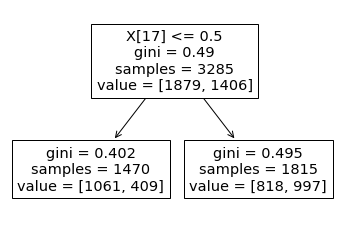

In [151]:
tree.plot_tree(clf3)

In [152]:
df_Train['Pred_3'] = clf3.predict(df_Train_X)
df_Train.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0       1           29.85         29.85              1            0   
1      34           56.95       1889.50              0            1   
2       2           53.85        108.15              0            1   
3      45           42.30       1840.75              0            1   
4       2           70.70        151.65              1            0   

   SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
0                 1                  0           0            1   
1                 1                  0           1            0   
2                 1                  0           1            0   
3                 1                  0           1            0   
4                 1                  0           1            0   

   Dependents_No  ...  PaperlessBilling_No  PaperlessBilling_Yes  \
0              1  ...                    0                     1   
1              1  ...                    1                     0   
2              1  ...                    0                     1   
3              1  ...                    1                     0   
4              1  ...                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn  Pred_1  Pred_2  Pred_3  
0                           0     No      No     Yes      No  
1                           1     No      No      No      No  
2                           1    Yes      No     Yes      No  
3                           0     No      No      No      No  
4                           0    Yes      No     Yes     Yes  

[5 rows x 50 columns]

In [153]:
y_true = df_Train[TARGET]
y_pred = df_Train['Pred_3']
accuracy_score(y_true, y_pred)

0.6641094062708472

In [154]:
df_Train['Pred_2'].value_counts()

Yes    3285
No     2711
Name: Pred_2, dtype: int64

In [155]:
df_Train[TARGET].value_counts()

No     4412
Yes    1584
Name: Churn, dtype: int64

In [156]:
df_Train['majority'] = df_Train[['Pred_1', 'Pred_2', 'Pred_3']].mode(axis=1)
df_Train.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0       1           29.85         29.85              1            0   
1      34           56.95       1889.50              0            1   
2       2           53.85        108.15              0            1   
3      45           42.30       1840.75              0            1   
4       2           70.70        151.65              1            0   

   SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
0                 1                  0           0            1   
1                 1                  0           1            0   
2                 1                  0           1            0   
3                 1                  0           1            0   
4                 1                  0           1            0   

   Dependents_No  ...  PaperlessBilling_Yes  \
0              1  ...                     1   
1              1  ...                     0   
2              1  ...                     1   
3              1  ...                     0   
4              1  ...                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn  Pred_1  Pred_2  Pred_3  majority  
0                           0     No      No     Yes      No        No  
1                           1     No      No      No      No        No  
2                           1    Yes      No     Yes      No        No  
3                           0     No      No      No      No        No  
4                           0    Yes      No     Yes     Yes       Yes  

[5 rows x 51 columns]

In [157]:
y_pred = df_Train['majority']
y_true = df_Train[TARGET]

In [158]:
df_Train[TARGET].value_counts()

No     4412
Yes    1584
Name: Churn, dtype: int64

In [159]:
df_Train['majority'].value_counts()

No     4181
Yes    1815
Name: majority, dtype: int64

In [160]:
accuracy_score(y_true, y_pred)

0.7656771180787192

In [161]:
f1_score(y_true, y_pred, average='weighted')

0.7704899717002002

An den Kennzahlen ist gut ersichtlich, dass die drei sehr schwachen Klassifikatoren ein verhältnismäßig gutes Ergebnis erzielen konnten. Da es sich hierbei jedoch um die Trainingsdaten handelt, wird nachfolgend eine Verifikation auf Basis der Testdaten vorgenommen. Dabei nutzen wir auch die 3 bereits trainierten Modelle.

In [162]:
df_Test['Pred_1'] = clf1.predict(df_Test_X)
df_Test['Pred_2'] = clf2.predict(df_Test_X)
df_Test['Pred_3'] = clf3.predict(df_Test_X)

In [163]:
df_Test.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
2481      61           25.00       1501.75              0            1   
6784      19           24.70        465.85              1            0   
6125      13          102.25       1359.00              0            1   
3052      37           55.05       2030.75              0            1   
4099       6           29.45        161.45              1            0   

      SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
2481                 0                  1           0            1   
6784                 1                  0           1            0   
6125                 1                  0           0            1   
3052                 1                  0           0            1   
4099                 1                  0           1            0   

      Dependents_No  ...  PaperlessBilling_No  PaperlessBilling_Yes  \
2481              1  ...                    1                     0   
6784              1  ...                    1                     0   
6125              1  ...                    0                     1   
3052              1  ...                    0                     1   
4099              1  ...                    1                     0   

      PaymentMethod_Bank transfer (automatic)  \
2481                                        1   
6784                                        1   
6125                                        0   
3052                                        0   
4099                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
2481                                      0                               0   
6784                                      0                               0   
6125                                      1                               0   
3052                                      0                               0   
4099                                      0                               0   

      PaymentMethod_Mailed check  Churn  Pred_1  Pred_2  Pred_3  
2481                           0     No      No      No      No  
6784                           0     No      No     Yes      No  
6125                           0    Yes      No     Yes     Yes  
3052                           1     No      No     Yes      No  
4099                           0     No      No     Yes      No  

[5 rows x 50 columns]

In [164]:
df_Test['majority'] = df_Test[['Pred_1', 'Pred_2', 'Pred_3']].mode(axis=1)

In [165]:
df_Test.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
2481      61           25.00       1501.75              0            1   
6784      19           24.70        465.85              1            0   
6125      13          102.25       1359.00              0            1   
3052      37           55.05       2030.75              0            1   
4099       6           29.45        161.45              1            0   

      SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
2481                 0                  1           0            1   
6784                 1                  0           1            0   
6125                 1                  0           0            1   
3052                 1                  0           0            1   
4099                 1                  0           1            0   

      Dependents_No  ...  PaperlessBilling_Yes  \
2481              1  ...                     0   
6784              1  ...                     0   
6125              1  ...                     1   
3052              1  ...                     1   
4099              1  ...                     0   

      PaymentMethod_Bank transfer (automatic)  \
2481                                        1   
6784                                        1   
6125                                        0   
3052                                        0   
4099                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
2481                                      0                               0   
6784                                      0                               0   
6125                                      1                               0   
3052                                      0                               0   
4099                                      0                               0   

      PaymentMethod_Mailed check  Churn  Pred_1  Pred_2  Pred_3  majority  
2481                           0     No      No      No      No        No  
6784                           0     No      No     Yes      No        No  
6125                           0    Yes      No     Yes     Yes       Yes  
3052                           1     No      No     Yes      No        No  
4099                           0     No      No     Yes      No        No  

[5 rows x 51 columns]

In [166]:
y_pred = df_Test['majority']
y_true = df_Test[TARGET]

In [167]:
df_Test[TARGET].value_counts()

No     734
Yes    266
Name: Churn, dtype: int64

In [168]:
df_Test['majority'].value_counts()

No     695
Yes    305
Name: majority, dtype: int64

In [169]:
accuracy_score(y_true, y_pred)

0.743

In [170]:
f1_score(y_true, y_pred, average='weighted')

0.7482697096300182

In [171]:
confusion_matrix(y_true, y_pred)

array([[586, 148],
       [109, 157]], dtype=int64)

Auch auf den Testdaten performen die 3 Modelle als Ensemble in Bezug auf deren Begrenzung in der Tiefe sehr gut. Da wir jedoch deutlich mehr Dimensionen in unserem Dataframe haben und ein besseres Verfahren nach diesem Grundprinzip benötigen, wird nachfolgend AdaBoost betrachtet.

<img src="source/adaboost_intro2.PNG" width="1000">

## Grundlagen AdaBoost

Nach der anfänglichen getrennten Arbeit an Boosting-Algorithmen schlugen Freund und Schapire gemeinsam den adaptiven Boosting-Algorithmus (AdaBoost) vor. Dieser Algorithmus ist heute eine bekannte und detailliert untersuchte Methode zur Erstellung von Klassifikatoren-Ensembles mit sehr guter Leistung (vgl. Ferreira and Figueiredo, 2012).

### Abgrenzung Boosting AdaBoost

AdaBoost hat zwei grundlegende Unterschiede zum Boosting: 

1. Es werden Instanzen aus einer iterativ aktualisierten Stichprobenverteilung der Trainingsdaten in die nachfolgenden Datensätze gezogen.


2. Die Klassifikatoren werden durch Abstimmung mit gewichteter Mehrheit kombiniert, wobei die Stimmgewichte auf den Trainingsfehlern der Klassifikatoren basieren, die ihrerseits entsprechend der Stichprobenverteilung gewichtet werden.
    
Tabelle 1 zeigt den Zusammenhang zwischen dem Boost-Algorithmus und AdaBoost. Verglichen werden hierbei die Algorithmen im Hinblick auf die Verarbeitung der Trainingsdaten, die Anzahl der Klassifikatoren und die Art und Weise, wie die endgültige Entscheidung zustande kommt (vgl. Ferreira and Figueiredo, 2012).

![alt text](source/Unterschied.PNG "Kern Unterschiede Boosting und AdaBoost")

### Hintergrund AdaBoost

Die Kernidee hinter AdaBoost ist die Verwendung gewichteter Versionen derselben Trainingsdaten anstelle von zufälligen Teilstichproben, welche das Boosting verwendet. Hierdurch entsteht zugleich ein Vorteil von Ada Boost da das gleiche Trainingsset immer wieder verwendet wird und deshalb im Gegensatz zu früheren Boosting-Methoden nicht mehr dieselben Herausforderungen in Hinsicht auf den Umfang der benötigenden Daten entstehen.

Der Grundsatz von AdaBoost folgt dabei dem Prinzip des Boostings indem ein Algorithmus eine Reihe von Klassifikatoren unter Verwendung von Weak Lernern erzeugt, um diese am Ende des Prozesses zu einem finalen starken Klassifikator zu kombinieren. Die schwachen Klassifikatoren werden dabei sequenziell unter Verwendung neu gewichteter Versionen der Trainingsdaten ermittelt, wobei die Gewichte von der Genauigkeit der vorherigen Klassifikatoren abhängen (vgl. Ferreira and Figueiredo, 2012). 

Dabei ist der Trainingssatz jeder Iteration immer derselbe, wobei jede Trainingsinstanz entsprechend ihrer (Fehl-)Klassifizierung durch die vorherigen Klassifikatoren gewichtet wird. Zu Beginn werden alle Gewichte gleich gesetzt, aber in jeder Runde werden die Gewichte der falsch klassifizierten Beispiele erhöht, so dass der schwache Klassifikator gezwungen ist, bei jeder Iteration, sich auf Muster zu konzentrieren, die von den bisherigen schwachen Klassifizierern nicht ausreichend gut klassifiziert wurden (vgl. Freund und Schapire, 1999).

Ein zentraler Punkt bei der Verwendung der Gewichtungen für die Instanzen ist, dass der nachfolgende Klassifikator mehr Informationen über die Bedeutung der einzelnen Instanzen erhält und darüber, wie die vorherigen Klassifikator mit der jeweiligen Instanz umgegangen sind. Dies geschieht weder beim Bagging noch beim Boosting.

Diese Idee dieses Prozesses von AdaBoost kann durch Abbildung 4 veranschaulicht werden. Hierbei wird jeder Weak Learner auf einer anderen gewichteten Version der Trainingsdaten trainiert. Es gibt keine unterschiedlichen Stichproben der Trainingsdaten und die Gewichtung der einzelnen Fälle für die folgende Iteration hängt von der Leistung des vorherigen schwachen Klassifikators ab (vgl. Ferreira and Figueiredo, 2012).

![alt text](source/AdaBoost.PNG "Grundprozess von AdaBoost.")

Hervorzuheben ist hierbei nochmals die Bedeutung der Weak Learner für AdaBoost. Diese sind besonders relevant, um die Basis-Klassifikatoren zu erhalten, sodass diese Muster erlernen können, ohne das Gewicht der zuvor korrekt klassifizierten Instanzen wesentlich zu verringern. 

Der Weak Learner bzw. Base-Lernalgorithmus muss dabei einen Fehler von weniger als 0.50 aufweisen, damit ist gewährleistet, dass mindestens ein zuvor falsch klassifiziertes Trainingsbeispiel korrekt klassifiziert wird. Wenn er dazu nicht in der Lage ist, bricht AdaBoost ab. Andernfalls fährt er fort, bis T-Klassifikatoren generiert werden, die dann mit der gewichteten Mehrheitsabstimmung kombiniert werden (vgl. Polikar, 2012).

Dabei ist zu beachten, dass Basis-Klassifikator, welche zu stark sind eine zu hohe Genauigkeit erreichen können, sodass in den folgenden Runden nur Ausreißer und verrauschte (noisy) Instanzen mit erheblichem Gewicht gelernt werden müssen.

Eine direkte Folge der Gewichtung von Instanzen ist, dass nach der M-AdaBoost-Runde die falsch klassifizierten Muster, denen höhere Gewichtungen zugewiesen wurden, "schwer" zu lernen sind. Diese Muster sind wahrscheinlich Ausreißer. Dies ist eine Art Nebeneffekt von AdaBoost, der zur Ausreißer-Erkennung bei einem gegebenen Trainingssatz verwendet werden kann (vgl. Ferreira and Figueiredo, 2012).


### Grundeigenschaft des Trainingsfehler 

#### Trainingsfehler

Die grundlegendste theoretische Eigenschaft und wichtiger Faktor der Güte der Klassifizierung von AdaBoost betrifft die Fähigkeit, den Trainingsfehler zu reduzieren also der Anteil der Fehler auf dem Trainingsset. 

Schreibt man den Fehler $ε_{t}$ von der Hypothese hat als $\frac{1}{2} − γ_{t}$, so gibt $γ_{t}$ an, um wie viel besser die Vorhersage des Weak Learners als der Zufall ist. Dies basiert auf der Überlegung, dass eine rein zufällige Hypothese im Durchschnitt einen Fehler von $\frac{1}{2}$ erzeugt, wenn die Ausgabe binär ist.

Ist die Hypothese des Weak Learners etwas besser als eine zufällige Hypothese, so ist $γ_{t}$ > $γ$ für ein $γ$  > 0. In diesem Fall fällt der Fehler exponentiel ab.

AdaBoost adaptiert die Fehlerraten der einzelnen Basislerner. Dies zeigt, daß AdaBoost tatsächlich ein Verfahren ist, daß eine Menge von schwachen Klassifikatoren, deren Entscheidungen etwas besser als random sind, zu einem starken Klassifikator kombinieren kann.

Eine ähnliche Eigenschaft haben auch die bisherigen Boosting-Algorithmen. Frühere Algorithmen erforderten jedoch, dass eine solche untere Grenze y a priori bekannt sein musste, bevor das Boosting beginnt.

In der Praxis ist es sehr schwierig, Kenntnisse über eine solche Grenze y zu erlangen. AdaBoost hingegen ist insofern anpassungsfähig, als es sich an die Fehlerraten der einzelnen schwachen Hypothesen anpasst. Dies ist daher auch die Grundlage für den Namen "Ada" wobei hiermit die "adaptiv" gemeint ist. (Freund und Schapire 1999)


#### Gewichtung

Die Gewichtung der Hypothesen bzw. schwachen Klassifikatoren geschieht nach der Formel:


\begin{align}
{α} & = \frac{1}{2} ln\frac{(1- ε)}{(ε)} \\
\end{align}


Beispiel für Gewichtung mit ε = 0.3:

\begin{align}
{α} & = \frac{1}{2} ln\frac{(1- 0.3)}{(0.3)} = 0.42365\\
\end{align}

Beispiel für Gewichtung mit ε = 0.7:

\begin{align}
{α} & = \frac{1}{2} ln\frac{(1- 0.7)}{(0.7)} = -0.42365\\
\end{align}

Beispiel für Gewichtung mit ε = 0.5:

\begin{align}
{α} & = \frac{1}{2} ln\frac{(1- 0.5)}{(0.5)} = 0\\
\end{align}

Drei interessante Beobachtungen:
    

1) Klassifikatoren mit einer Genauigkeit von mehr als 50% ergibt ein positives Gewicht für den Klassifikator oder mit anderen Worten: α > 0, wenn ε < 0.5. 

2) Die Gewichtung von Klassifikatoren mit einer Genauigkeit von exakt 50% ist 0 und trägt somit nicht zur endgültigen Vorhersage bei.

3) Die Fehlerrate von 0.3 und 0.7 führen zu Klassifikator-Gewichten mit umgekehrten Vorzeichen.


### Entwicklung von AdaBoost

Die Theorie des Boosting bildete die Grundlage für die nachfolgenden Suites von AdaBoost-Algorithmen, den wohl populärsten ensemblebasierten Algorithmen, die das Boosting-Konzept auf Mehrklassenprobleme (AdaBoost.M1, AdaBoost.M2), Regressionsprobleme(AdaBoost.R) und sogar Probleme des unüberwachten Lernens ausweiten. (vgl. Meir und Rätsch, 2003; Polikar, 2012; Schapire, 2003) 


<img src="source/timeline.PNG" width="800">

Viele dieser Varianten haben sich in verschiedenen Arten von Lernszenarien als erfolgreich erwiesen. Der Vorschlag des AdaBoost-Algorithmus stimulierte eine beträchtliche Menge an Forschung über diese Art von Lernmethode, wobei seine theoretischen Eigenschaften und experimentellen Leistungen genutzt wurden. Aus dieser Forschung sind mehrere Varianten von AdaBoost hervorgegangen, von denen einige auf spezifische Probleme ausgerichtet sind, wie z.B. Gesichtserkennung und Textkategorisierung. 

Diese Varianten folgen der allgemeinen Struktur von AdaBoost (Lernen eines schwachen Klassifikators, Berechnung des Fehlerumfangs, Aktualisierung der Gewichte der Trainingsmuster und Wiederholung des Prozesses), führen jedoch Änderungen bei mehreren Aspekten ein, wie z.B. dem Ausdruck zur Aktualisierung der Gewichte und der Verwaltung der Klassifikatoren (vgl. Ferreira and Figueiredo, 2012).

## Praxisbeispiel AdaBoost

In diesem Praxisbeispiel wenden wir den AdaBoost Algorithmus an, um auf Basis von schwachen Decision Trees ein starkes Ensemble zu erreichen. Hierbei beschränken wir uns auf das Basisvorgehen, da wir die Stärke von AdaBoost ohne umfangreichem Hyperparametertuning zeigen möchten. Auch hier nutzen wir Decision Trees mit einer Tiefe von 1. Die Auswirkung der Anzahl an verwendeten Bäume wird anhand einer Darstellung gezeigt. Auf Basis dieser Darstellung wird die Wahl der Anzahl für dieses Beispiel gewählt und angewendet.

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate

In [173]:
dtc = DecisionTreeClassifier(random_state=42, max_depth=1)

In [174]:
estimator_range = range(1,100,1)
training_accuracy = []
test_accuracy = []

In [175]:
for estimator in estimator_range:
    clf = AdaBoostClassifier(base_estimator=dtc, n_estimators=estimator, random_state=42)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

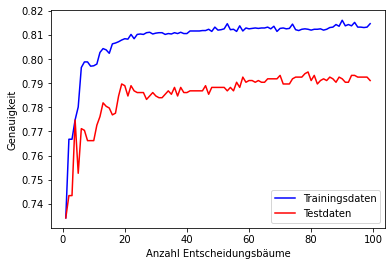

In [176]:
plt.plot(estimator_range, training_accuracy, color='blue', label="Trainingsdaten")
plt.plot(estimator_range, test_accuracy, color='red', label="Testdaten")
plt.ylabel("Genauigkeit")
plt.xlabel("Anzahl Entscheidungsbäume")
plt.legend(loc='best');

In [177]:
best_estimator = estimator_range[np.argmax(test_accuracy)]
best_estimator

79

In [178]:
clf = AdaBoostClassifier(base_estimator=dtc, n_estimators=best_estimator, random_state=42)

In [179]:
clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=42),
                   n_estimators=79, random_state=42)

In [180]:
scoring_adaboost_train = clf.score(X_train, y_train)
scoring_adaboost_train

0.8122666666666667

In [181]:
scoring_adaboost_test = clf.score(X_test, y_test)
scoring_adaboost_test

0.7945984363894811

In [182]:
y_pred = clf.predict(X_test)
y_true = y_test

In [183]:
confusion_matrix(y_true, y_pred)

array([[929, 104],
       [185, 189]], dtype=int64)

In [184]:
predictions_adaboost_cv = np.mean(cross_validate(clf,X,y,cv=20)['test_score'])
predictions_adaboost_cv

0.8048963189588191

Im Vergleich zu dem Grundgedanken von Boosting kann gesagt werden, dass AdaBoost durch die höhere Anzahl an Modellen und dem dahinterliegenden Algorithmus eine bessere Gesamtgüte erzielen kann. Es ist jedoch anzumerken, dass sich die Güte nur ein wenig verbessert hat, was die Stärke von bereits drei schwachen Klassifikatoren im Boosting klar aufzeigt.

## Vor- und Nachteile

#### Vorteile

- Durch die Verwendung von Ensembles kann das Risiko einer Fehlklassifikation reduziert werden. (Polikar, 2012)
- Zu kleine, große oder komplexe Datensätze können durch den Einsatz eines Ensembles besser verarbeitet werden. (Polikar, 2012)
- Boosting ist robuster gegen Overfitting (Polikar, 2012; Breiman, 2001)

#### Nachteile

- Boosting ist im Gegensatz zum Bagging anfälliger für Verunreinigungen in den Daten. (Khoshgoftaar et al., 2010)
- Boosting kann bei einer hohen Anzahl an Interationen auch Anzeichen eines Overfittings aufzeigen (jedoch nur in Bezug auf Base Classifiers). (Meir und Rätsch, 2003; Breiman, 2001)
- Längere Laufzeit als Random Forest (Random Forest ermöglicht die Parallelisierung). (Breiman, 2001) 


## Literatur

[1] Ferreira, A. J. and Figueiredo, A. T. (2012) Ensemble Machine Learning, Ensemble Machine Learning. doi: 10.1007/978-1-4419-9326-7.

[2] Freund, Y. and Schapire, R. E. (1999) A Short Introduction to Boosting, Journal of Japanese Society for Artificial Intelligence. Available at: www.research.att.com/.

[3] Polikar, R. (2012) Ensemble Machine Learning, Ensemble Machine Learning. doi: 10.1007/978-1-4419-9326-7.

[4] Schapire, R. E. (2003) ‘The Boosting Approach to Machine Learning: An Overview’, pp. 149–171. doi: 10.1007/978-0-387-21579-2_9.

[5] Valiant, L. G. (1984) ‘A theory of the learnable’, Communications of the ACM. doi: 10.1145/1968.1972.

[6] Kearns, M. and Valiant, L. (1994) ‘Cryptographic Limitations on Learning Boolean Formulae and Finite Automata’, Journal of the ACM (JACM). doi: 10.1145/174644.174647.

[7] Schapire, R. E. (1990) ‘The Strength of Weak Learnability’, Machine Learning. doi: 10.1023/A:1022648800760.

[8] Freund, Y. and Schapire, R. E. (1999) A Short Introduction to Boosting, Journal of Japanese Society for Artificial Intelligence. Available at: www.research.att.com/.

[9] Freund, Y. (1995) ‘Boosting a weak learning algorithm by majority’, Information and Computation. doi: 10.1006/inco.1995.1136.

[10] Meir, R. and Rätsch, G. (2003) An Introduction to Boosting and Leveraging. Available at: http://www-ee.technion.ac.il/˜rmeirhttp://mlg.anu.edu.au/˜raetsch.

[11] Breiman, L. (2001) ‘Random Forests‘, Machine Learning, 45(1) doi: 10.1023/A:1010933404324.

[12] Khoshgoftaar, T. M., Van Hulse, J. und Napolitano, A. (2010) ‘Comparing boosting and bagging techniques with noisy and imbalanced data‘, S. 552–568. doi: 10.1109/TSMCA.2010.2084081.
